In [ ]:
!pip install -q opendatasets

import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/nilesh789/eurosat-rgb")

# **Import some libraries & Dataset**
[**Access dataset via kaggle**](https://www.kaggle.com/datasets/nilesh789/eurosat-rgb)

In [ ]:
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
DATASET = "/content/eurosat-rgb/2750"

LABELS = os.listdir(DATASET)
print(LABELS)

['PermanentCrop', 'Pasture', 'River', 'AnnualCrop', 'Highway', 'SeaLake', 'HerbaceousVegetation', 'Forest', 'Industrial', 'Residential']


We have various type of images in our dataset (Types of images shown above)

# **1- Some EDA on the Dataset**

## Visualize classes distribution

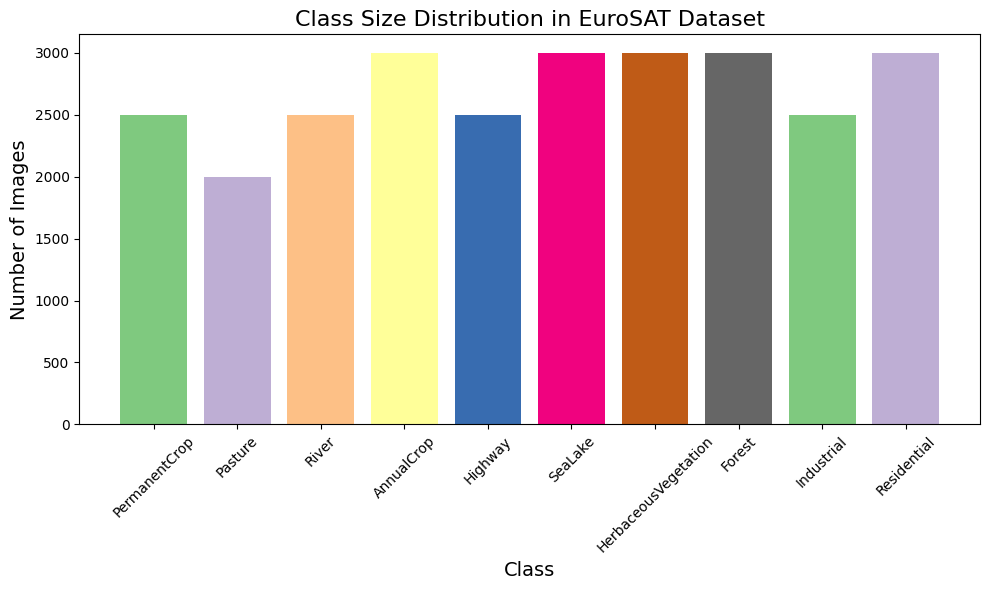

In [ ]:
class_counts = {}
for folder in os.listdir(DATASET):
    class_path = os.path.join(DATASET, folder)
    if os.path.isdir(class_path):
        class_counts[folder] = len(os.listdir(class_path))

# Create a color palette from seaborn
palette = sns.color_palette("Accent", len(class_counts))

# Plot the class size distribution with the color palette
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=palette)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Class Size Distribution in EuroSAT Dataset', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualize class proportions

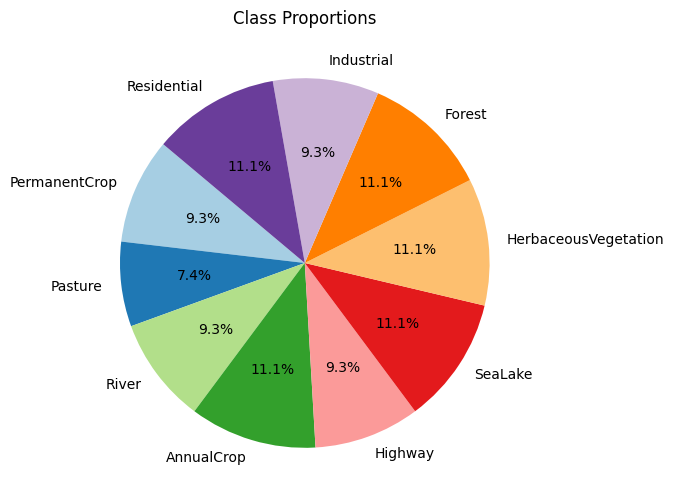

In [ ]:
# Plot class proportions
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Class Proportions')
plt.show()

## Checking Dataset dimension

In [ ]:
# Check the dimensions of the images in the dataset.
from PIL import Image
import os

def check_image_size(image_path):
    """Check the dimensions of an image."""
    with Image.open(image_path) as img:
        return img.size  # Returns the dimensions (width, height)

def check_image_dimensions(DATASET):
    """Check if all images in the dataset have the same dimensions."""
    all_dimensions = set()  # Set to store unique dimensions

    for folder in os.listdir(DATASET):
        class_path = os.path.join(DATASET, folder)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                width, height = check_image_size(image_path)
                all_dimensions.add((width, height))

    # Check if all dimensions are the same
    if len(all_dimensions) == 1:
        dim = all_dimensions.pop()  # Get the only dimension in the set
        print(f"All images have the same dimensions: {dim[0]}x{dim[1]}")
    else:
        print("Images have different dimensions.")

check_image_dimensions(DATASET)

All images have the same dimensions: 64x64


## Checking Duplicates

In [ ]:
# Check for Duplicates
import hashlib

def get_image_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

seen_hashes = set()
duplicates = []
for folder in os.listdir(DATASET):
    class_path = os.path.join(DATASET, folder)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            img_hash = get_image_hash(image_path)
            if img_hash in seen_hashes:
                duplicates.append(image_path)
            else:
                seen_hashes.add(img_hash)

print(f"Found {len(duplicates)} duplicate images.")

Found 0 duplicate images.


## Visualize Samples from Dataset

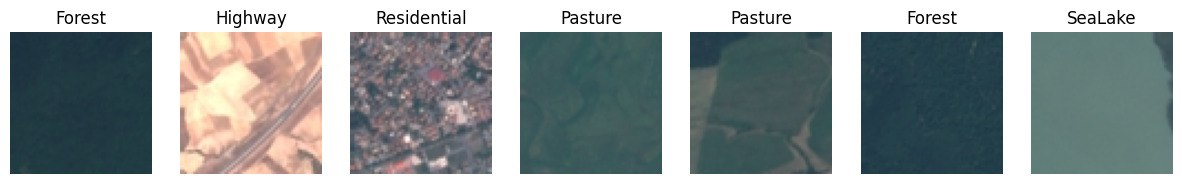

In [ ]:
# Visualize Samples of Images

import random
from PIL import Image

def plot_random_samples(DATASET, num_samples=7):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, ax in enumerate(axes):
        class_folder = random.choice(os.listdir(DATASET))
        class_path = os.path.join(DATASET, class_folder)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_folder)
    plt.show()

plot_random_samples(DATASET)

## RGB Channel Analysis

In [ ]:
import cv2

# Calculate mean and std for RGB channels
rgb_means = []
rgb_stds = []

for folder in os.listdir(DATASET):
    folder_path = os.path.join(DATASET, folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        rgb_means.append(np.mean(img, axis=(0, 1)))
        rgb_stds.append(np.std(img, axis=(0, 1)))

mean_rgb = np.mean(rgb_means, axis=0)
std_rgb = np.mean(rgb_stds, axis=0)

print(f"Mean RGB values: {mean_rgb}")
print(f"Standard Deviation of RGB values: {std_rgb}")

Mean RGB values: [ 87.81586936  96.97416421 103.98142337]
Standard Deviation of RGB values: [23.29876866 16.60519654 14.08630406]


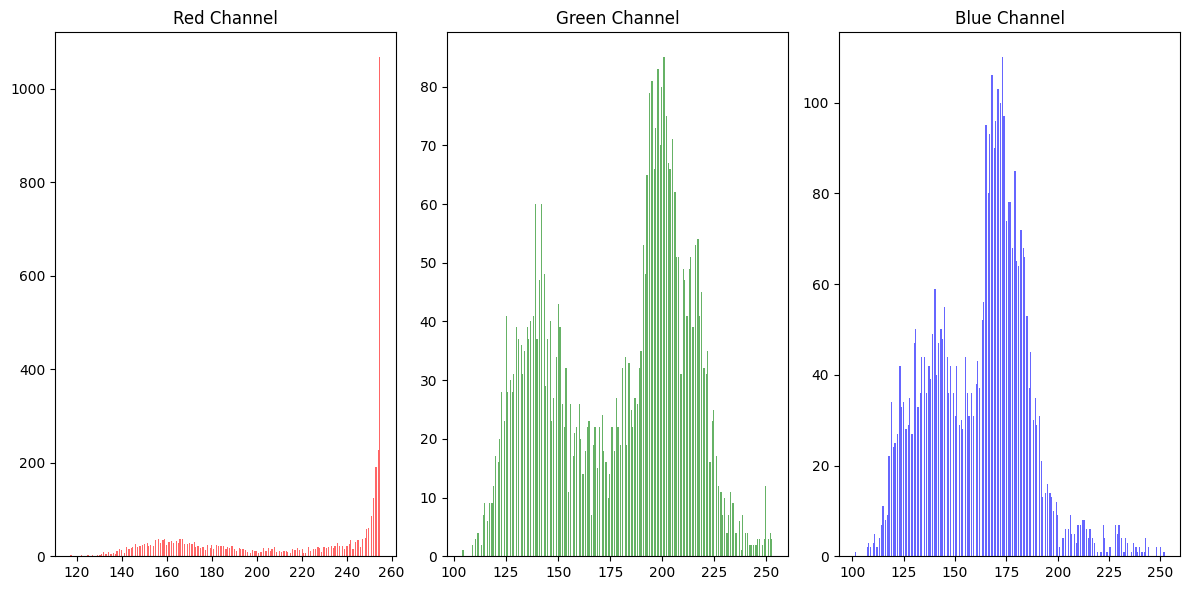

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the RGB channel histograms
def plot_rgb_histograms(image_path):
    # Open the image
    img = Image.open(image_path).convert('RGB')

    # Convert image to numpy array
    img_array = np.array(img)

    # Split the image into its RGB channels
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]

    # Plot histograms for each channel
    plt.figure(figsize=(12, 6))

    # Red channel histogram
    plt.subplot(131)
    plt.hist(r.flatten(), bins=256, color='red', alpha=0.6)
    plt.title('Red Channel')

    # Green channel histogram
    plt.subplot(132)
    plt.hist(g.flatten(), bins=256, color='green', alpha=0.6)
    plt.title('Green Channel')

    # Blue channel histogram
    plt.subplot(133)
    plt.hist(b.flatten(), bins=256, color='blue', alpha=0.6)
    plt.title('Blue Channel')

    plt.tight_layout()
    plt.show()

sample_class_folder = random.choice(os.listdir(DATASET))
sample_class_path = os.path.join(DATASET, sample_class_folder)
sample_image_name = random.choice(os.listdir(sample_class_path))
sample_image_path = os.path.join(sample_class_path, sample_image_name)
plot_rgb_histograms(sample_image_path)

# **2- Preprocessing**

## Dataset Augmentation

In [ ]:
import re
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '../content/training'
TEST_DIR = '../content/testing'
BATCH_SIZE = 64
NUM_CLASSES=len(LABELS)
INPUT_SHAPE = (64, 64, 3)
CLASS_MODE = 'categorical'

# create training and testing directories
for path in (TRAIN_DIR, TEST_DIR):
    if not os.path.exists(path):
        os.mkdir(path)

# create class label subdirectories in train and test
for l in LABELS:

    if not os.path.exists(os.path.join(TRAIN_DIR, l)):
        os.mkdir(os.path.join(TRAIN_DIR, l))

    if not os.path.exists(os.path.join(TEST_DIR, l)):
        os.mkdir(os.path.join(TEST_DIR, l))

In [ ]:
# map each image path to their class label in 'data'
data = {}

for l in LABELS:
    for img in os.listdir(DATASET+'/'+l):
        data.update({os.path.join(DATASET, l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=69)

# split the list of image paths
for train_idx, test_idx in split.split(X, y):

    train_paths = X[train_idx]
    test_paths = X[test_idx]

    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub('/content/eurosat-rgb/2750', '../content/training', i) for i in train_paths]
    new_test_paths = [re.sub('/content/eurosat-rgb/2750', '../content/testing', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))

    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

moving training files..


100%|██████████| 21600/21600 [00:03<00:00, 6724.15it/s]


moving testing files..


100%|██████████| 5400/5400 [00:01<00:00, 3975.59it/s]


In [ ]:
# Create a ImageDataGenerator Instance which can be used for data augmentation

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
)

train_generator = train_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    #subset='training',
    color_mode='rgb',
    shuffle=True,
    seed=69
)

# test generator for evaluation purposes with no augmentations, just rescaling
test_gen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [ ]:
print(train_generator.class_indices)
np.save('class_indices', train_generator.class_indices)

{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


# **3- Deep Learning Modeling with ResNet50**

## Importing some deep learning libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score
from tensorflow.keras.optimizers import Adam

## Check GPUs

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

tf.config.set_soft_device_placement(True)

1 Physical GPUs, 1 Logical GPU


## Initializing ResNet50 `compile_model` function

In [ ]:
def compile_model(input_shape, n_classes, optimizer, fine_tune=None):
    # Initialize ResNet50 base
    conv_base = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=input_shape)

    # Add classification head
    top_model = conv_base.output
    top_model = Flatten()(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Create and compile model
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Handle fine-tuning
    if type(fine_tune) == int:
        for layer in conv_base.layers[fine_tune:]:
            layer.trainable = True
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])

    return model

## Define some functions for modeling

In [ ]:
def plot_history(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

def display_results(y_true, y_preds, class_labels):
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T
    results.rename(columns={0: 'Precision',
                           1: 'Recall',
                           2: 'F-Score',
                           3: 'Support'}, inplace=True)

    conf_mat = pd.DataFrame(confusion_matrix(y_true, y_preds),
                            columns=class_labels,
                            index=class_labels)
    f2 = fbeta_score(y_true, y_preds, beta=2, average='micro')
    accuracy = accuracy_score(y_true, y_preds)
    print(f"Accuracy: {accuracy}")
    print(f"Global F2 Score: {f2}")
    return results, conf_mat

def plot_predictions(y_true, y_preds, test_generator, class_indices):
    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = np.argmax(y_preds[idx])
        true_idx = y_true[idx]

        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

## Parameters and callbacks

In [ ]:
# Training parameters and callbacks
N_STEPS = train_generator.samples // BATCH_SIZE
N_VAL_STEPS = test_generator.samples // BATCH_SIZE
N_EPOCHS = 10

checkpoint = ModelCheckpoint(filepath='../content/model.weights.best.keras',
                             monitor='val_categorical_accuracy',
                             save_best_only=True,
                             verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)

## Model Summary

In [ ]:
resnet50_model = compile_model(INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-2), fine_tune=None)
resnet50_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 40,387,466 (154.07 MB)

 Trainable params: 16,799,754 (64.09 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
train_generator.reset()
test_generator.reset()

N_STEPS = train_generator.samples//BATCH_SIZE
N_VAL_STEPS = test_generator.samples//BATCH_SIZE
N_EPOCHS = 10

## First Pretraining

In [ ]:
# First Pretraining the dense layer
resnet50_history = resnet50_model.fit(train_generator,
                                      steps_per_epoch=N_STEPS,
                                      epochs=10,
                                      callbacks=[early_stop, checkpoint],
                                      validation_data=test_generator,
                                      validation_steps=N_VAL_STEPS)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
335/337 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - categorical_accuracy: 0.1472 - loss: 4.3226
Epoch 1: val_categorical_accuracy improved from -inf to 0.27697, saving model to ../content/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 85s 208ms/step - categorical_accuracy: 0.1475 - loss: 4.3069 - val_categorical_accuracy: 0.2770 - val_loss: 1.7616
Epoch 2/10
  1/337 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - categorical_accuracy: 0.2031 - loss: 1.8208

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_categorical_accuracy improved from 0.27697 to 0.28441, saving model to ../content/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - categorical_accuracy: 0.2031 - loss: 1.8208 - val_categorical_accuracy: 0.2844 - val_loss: 1.7811
Epoch 3/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - categorical_accuracy: 0.2433 - loss: 1.9124
Epoch 3: val_categorical_accuracy improved from 0.28441 to 0.36124, saving model to ../content/model.weights.best.keras
337/337 ━━━━━━━━━━━━━━━━━━━━ 49s 146ms/step - categorical_accuracy: 0.2433 - loss: 1.9123 - val_categorical_accuracy: 0.3612 - val_loss: 1.7646
Epoch 4/10
  1/337 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - categorical_accuracy: 0.2969 - loss: 1.8855
Epoch 4: val_categorical_accuracy did not improve from 0.36124
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - categorical_accuracy: 0.2969 - loss: 1.8855 - val_categorical_accuracy: 0.3317 - val_loss: 1.7803
Epoch 5/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - categorical_a

## Training whole network

In [ ]:
# Re-train whole network end-to-end
resnet50_model = compile_model(INPUT_SHAPE, NUM_CLASSES, Adam(learning_rate=1e-4), fine_tune=0)

resnet50_model.load_weights('/content/model.weights.best.keras')

train_generator.reset()
test_generator.reset()

resnet50_history = resnet50_model.fit(train_generator,
                                      steps_per_epoch=N_STEPS,
                                      epochs=N_EPOCHS,
                                      callbacks=[early_stop, checkpoint, reduce_lr],
                                      validation_data=test_generator,
                                      validation_steps=N_VAL_STEPS)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - categorical_accuracy: 0.6567 - loss: 2.9811
Epoch 1: val_categorical_accuracy did not improve from 0.38039
337/337 ━━━━━━━━━━━━━━━━━━━━ 140s 237ms/step - categorical_accuracy: 0.6571 - loss: 2.9756 - val_categorical_accuracy: 0.0817 - val_loss: 55.8429 - learning_rate: 1.0000e-04
Epoch 2/10
  1/337 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - categorical_accuracy: 0.8750 - loss: 0.4316
Epoch 2: val_categorical_accuracy did not improve from 0.38039
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - categorical_accuracy: 0.8750 - loss: 0.4316 - val_categorical_accuracy: 0.1014 - val_loss: 55.4923 - learning_rate: 1.0000e-04
Epoch 3/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - categorical_accuracy: 0.8902 - loss: 0.3335
Epoch 3: val_categorical_accuracy did not improve from 0.38039
337/337 ━━━━━━━━━━━━━━━━━━━━ 54s 160ms/step - categorical_accuracy: 0.8902 - loss: 0.3334 - val_categorical_accuracy: 0.0863 - val_loss: 38.7680 - learning_rate: 1.000

## Plot Evaluation Result

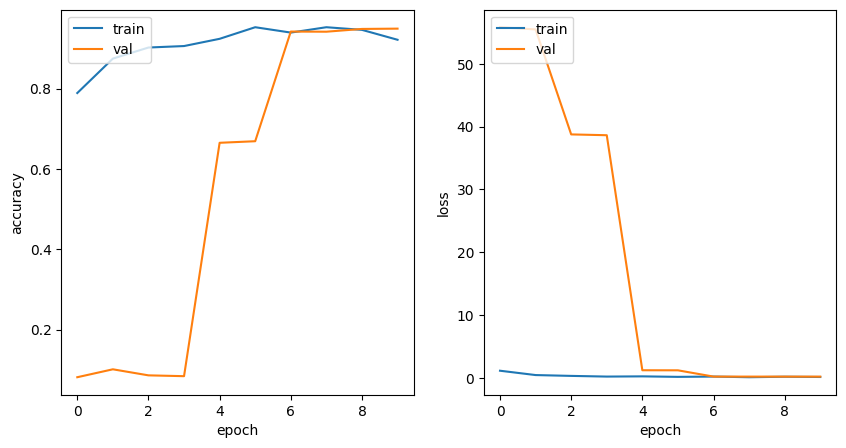

In [ ]:
plot_history(resnet50_history)

## Load model weights

In [ ]:
# Load model weights
resnet50_model.load_weights('/content/model.weights.best.keras')

class_indices = train_generator.class_indices
class_indices = dict((v, k) for k, v in class_indices.items())

test_generator_new = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=1,
    class_mode=None,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

predictions = resnet50_model.predict(test_generator_new, steps=len(test_generator_new.filenames))
predicted_classes = np.argmax(np.rint(predictions), axis=1)
true_classes = test_generator_new.classes

prf, conf_mat = display_results(true_classes, predicted_classes, class_indices.values())

prf

Found 5400 images belonging to 10 classes.
5400/5400 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step
Accuracy: 0.9475925925925925
Global F2 Score: 0.9475925925925925


,Precision,Recall,F-Score,Support
AnnualCrop,0.935750,0.946667,0.941176,600.0
Forest,0.938871,0.998333,0.967690,600.0
HerbaceousVegetation,0.975133,0.915000,0.944110,600.0
Highway,0.945122,0.930000,0.937500,500.0
Industrial,0.991091,0.890000,0.937829,500.0
Pasture,0.959350,0.885000,0.920676,400.0
PermanentCrop,0.932406,0.938000,0.935194,500.0
Residential,0.887407,0.998333,0.939608,600.0
River,0.939571,0.964000,0.951629,500.0
SeaLake,0.993232,0.978333,0.985726,600.0


## Save the model

In [ ]:
# Save the model and the weights
resnet50_model.save('../content/ResNet50_eurosat.h5')

# **Compress & Downlaod Project Files**

In [ ]:
!zip -r /content/eurosat_project.zip /content/
!pip install -U -q PyDrive
from google.colab import files
files.download("/content/eurosat_project.zip")

Streaming output truncated to the last 5000 lines.
  adding: content/training/Forest/Forest_2171.jpg (deflated 4%)
  adding: content/training/Forest/Forest_2899.jpg (deflated 4%)
  adding: content/training/Forest/Forest_2925.jpg (deflated 4%)
  adding: content/training/Forest/Forest_2521.jpg (deflated 5%)
  adding: content/training/Forest/Forest_2207.jpg (deflated 5%)
  adding: content/training/Forest/Forest_667.jpg (deflated 5%)
  adding: content/training/Forest/Forest_1185.jpg (deflated 4%)
  adding: content/training/Forest/Forest_2251.jpg (deflated 4%)
  adding: content/training/Forest/Forest_187.jpg (deflated 4%)
  adding: content/training/Forest/Forest_1018.jpg (deflated 4%)
  adding: content/training/Forest/Forest_1340.jpg (deflated 4%)
  adding: content/training/Forest/Forest_2970.jpg (deflated 5%)
  adding: content/training/Forest/Forest_1995.jpg (deflated 3%)
  adding: content/training/Forest/Forest_461.jpg (deflated 4%)
  adding: content/training/Forest/Forest_2223.jpg (defla

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/eurosat_project.zip /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
